In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class Perceptron:
    def __init__(self, X, Y, lr=0.001, plot=True):
        """
        初始化感知机
        :param X: 特征向量
        :param Y: 类别
        :param lr: 学习率
        :param plot: 是否绘制图形
        """
        self.X = X
        self.Y = Y
        self.lr = lr
        self.plot = plot
        if plot:
            self.__module__plot = self._ModelPlot(self.X, self.Y)
            self.__module__plot.open_in()

    def fit(self):
        # （1）初始化weight, b
        weight = np.zeros(self.X.shape[1])
        b = 0
        # 训练次数
        trains_counts = 0
        # 分类错误标识
        mistake_flag = True
        while mistake_flag:
            # 开始前，将mistake_tag设置为false，用于判断本次循环是否有分类错误
            mistake_flag = False
            # （2）从训练集中选取x，y
            for index in range(self.X.shape[0]):
                if self.plot:
                    self.__module__plot.plot(weight, b, trains_counts)
                # 损失函数
                loss = self.Y[index] * (weight @ self.X[index] + b)
                # （3）如果损失函数小于0，则该点是误分类点
                if loss <= 0:
                    # 更新weight, b
                    weight += self.lr * self.Y[index] * self.X[index]
                    b += self.lr * self.Y[index]
                    # 训练次数加1
                    trains_counts += 1
                    print("Epoch {}, weight = {}, b = {}, formula = {}".format(trains_counts, weight, b, self.__module__plot.formula(weight, b)))
                    # 本次循环有误分类点（即分类错误），置为True
                    mistake_flag = True
                    break
        if self.plot:
            self.__module__plot.close()
        # （4）直至训练集中没有误分类点
        return weight, b

    class _ModelPlot:
        def __init__(self, X, Y):
            self.X = X
            self.Y = Y
        
        @staticmethod
        def open_in():
            # 打开交互模式，用于展示动态交互图
            plt.ion()

        @staticmethod
        def close():
            # 关闭交互模式，并显示最终的图形
            plt.ioff()
            plt.show()

        def plot(self, weight, b, epoch):
            plt.cla()
            # x轴表示x1
            plt.xlim(0, np.max(self.X.T[0]) + 1)
            # y轴表示x2
            plt.ylim(0, np.max(self.X.T[1]) + 1)
            # 画出散点图，并添加图示
            scatter = plt.scatter(self.X.T[0], self.X.T[1], c=self.Y)
            plt.legend(*scatter.legend_elements())
            if True in list(weight == 0):
                plt.plot(0, 0)
            else:
                x1 = -b / weight[0]
                x2 = -b / weight[1]
                # 画出分离超平面
                plt.plot([x1, 0], [0, x2])
                # 绘制公式
                text = self.formula(weight, b)
                plt.text(0.3, x2 - 0.1, text)
            plt.title('Epoch %d' % epoch)
            plt.pause(0.01)
        
        @staticmethod
        def formula(weight, b):
            text = 'x1 ' if weight[0] == 1 else '%d*x1' % weight[0]
            text += '+ x2 ' if weight[1] == 1 else (
                '+ %d*x2 ' % weight[1] if weight[1] > 0 else '- %d*x2 ' % -weight[1])
            text += '= 0' if b == 0 else ('+ %d = 0' % b if b > 0 else '- %d = 0' % -b)
            return text

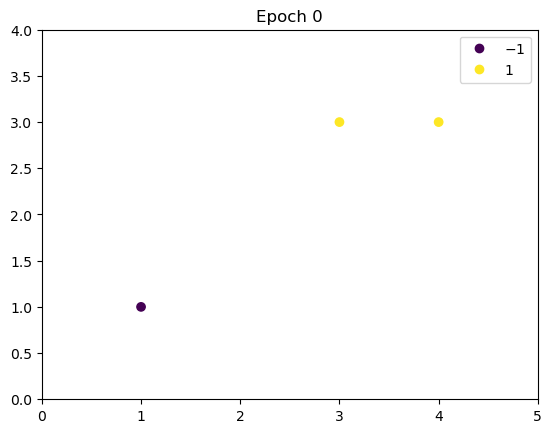

Epoch 1, weight = [3. 3.], b = 1, formula = 3*x1+ 3*x2 + 1 = 0


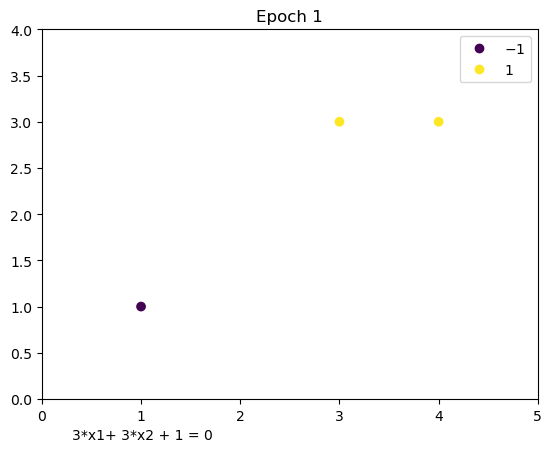

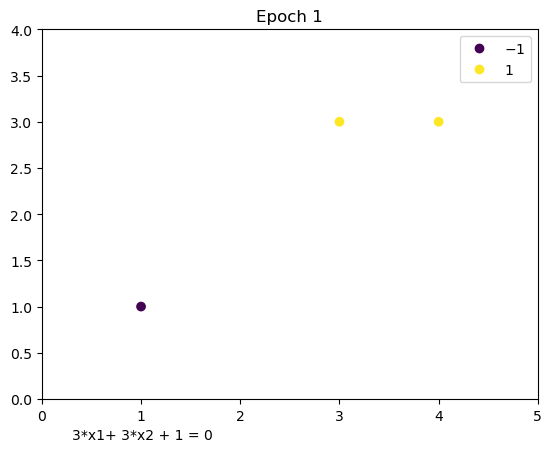

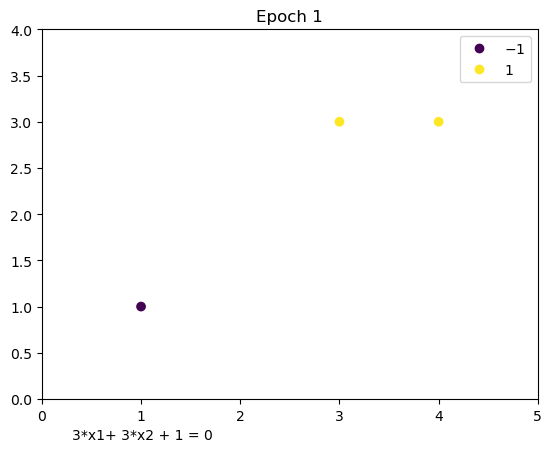

Epoch 2, weight = [2. 2.], b = 0, formula = 2*x1+ 2*x2 = 0


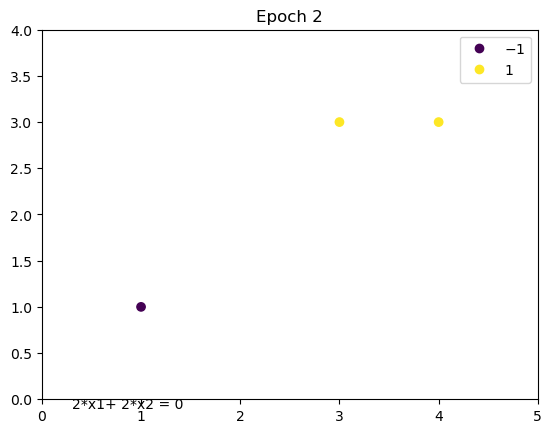

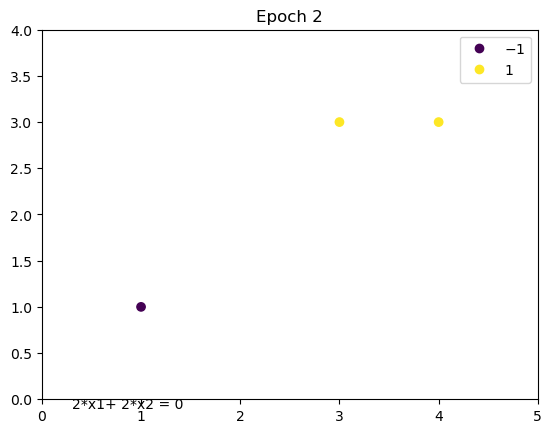

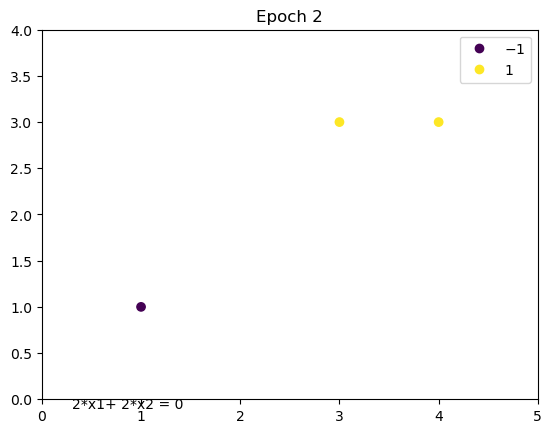

Epoch 3, weight = [1. 1.], b = -1, formula = x1 + x2 - 1 = 0


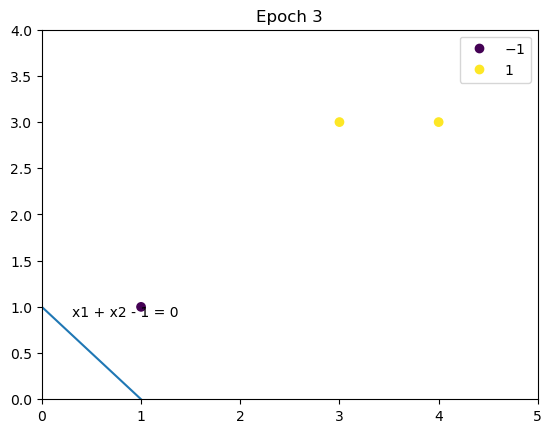

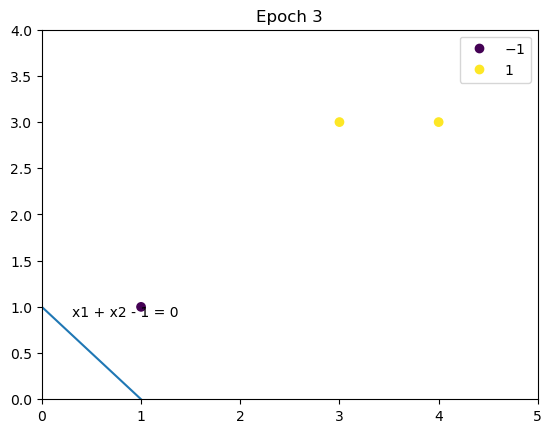

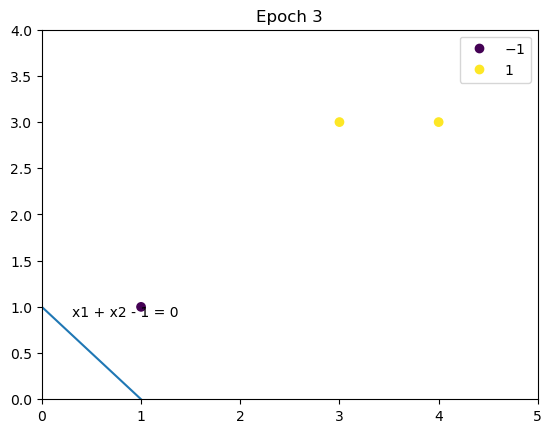

Epoch 4, weight = [0. 0.], b = -2, formula = 0*x1- 0*x2 - 2 = 0


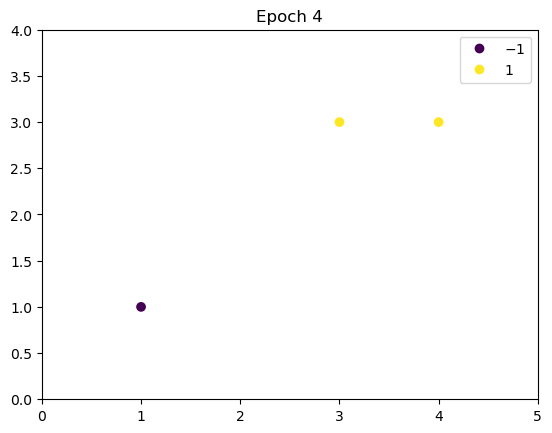

Epoch 5, weight = [3. 3.], b = -1, formula = 3*x1+ 3*x2 - 1 = 0


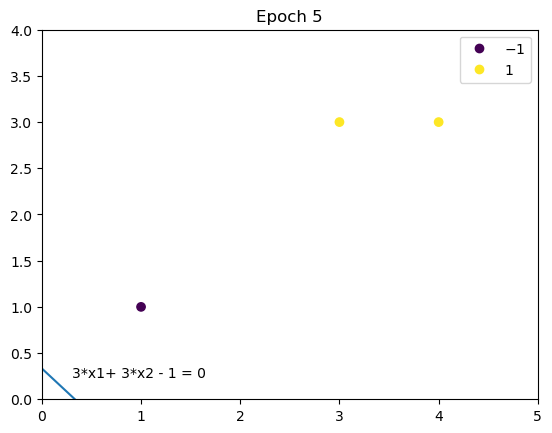

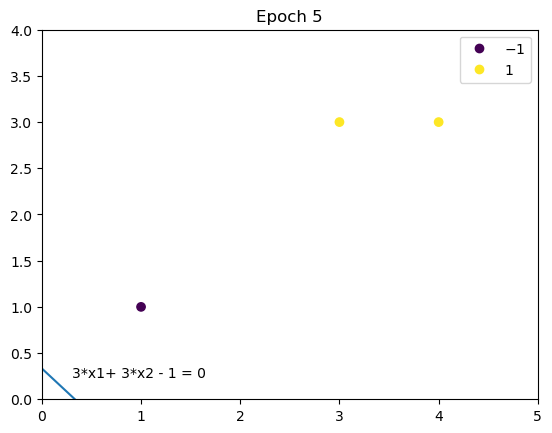

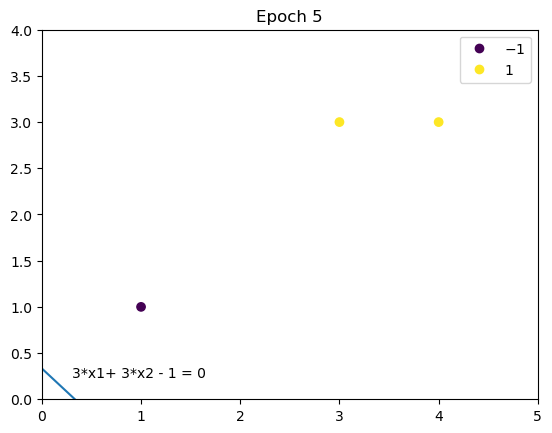

Epoch 6, weight = [2. 2.], b = -2, formula = 2*x1+ 2*x2 - 2 = 0


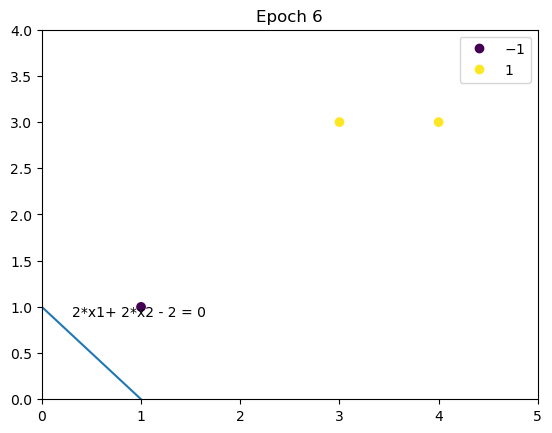

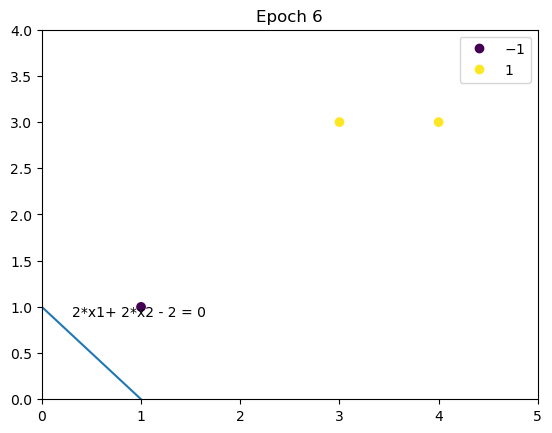

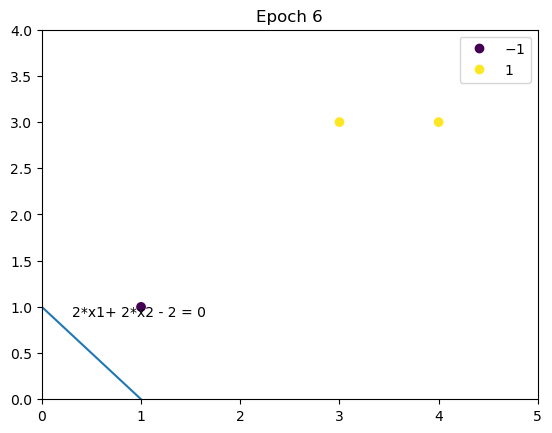

Epoch 7, weight = [1. 1.], b = -3, formula = x1 + x2 - 3 = 0


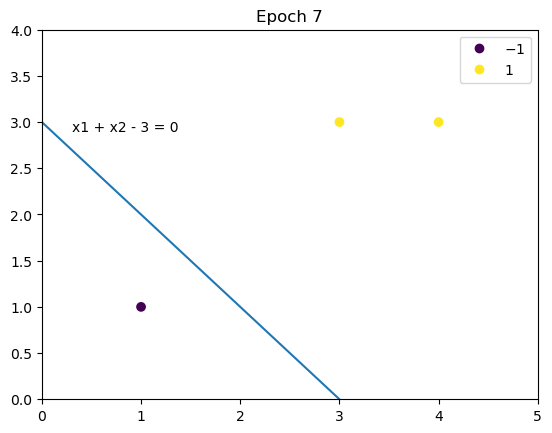

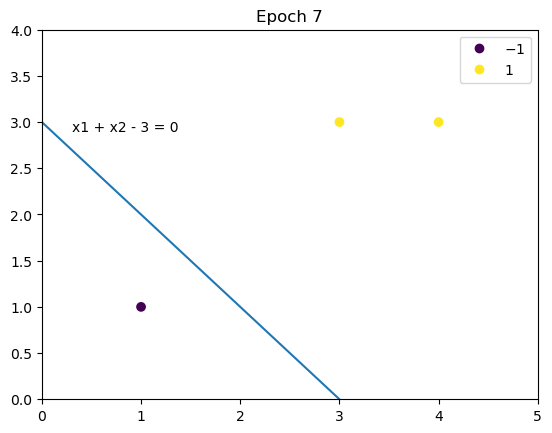

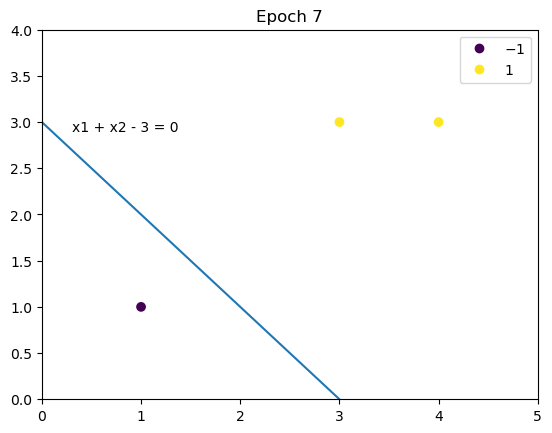

In [3]:
X = np.array([[3, 3], [4, 3], [1, 1]])
Y = np.array([1, 1, -1])
model = Perceptron(X, Y, lr=1)
weight, b = model.fit()